# speedy simulations with msprime

our goal will be to explore how demography affects site counts given a quartet tree.

imports:

In [1]:
import numpy as np
import msprime

/Users/pmckenz1/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# Population IDs correspond to their indexes in the population
# configuration array. Therefore, we have 0=p1, 1=p2, 2=p3, 3=p4
# initially.

In [457]:
ancNe = 100000
t_12 = ancNe*4.*1./12.
t_123 = ancNe*4.*5./6.
t_1234 = ancNe*4.

In [458]:
pop_config = [msprime.PopulationConfiguration(sample_size=1,
                                initial_size=ancNe,
                                growth_rate=0),
              msprime.PopulationConfiguration(sample_size=1,
                                initial_size=ancNe,
                                growth_rate=0),
              msprime.PopulationConfiguration(sample_size=1,
                                initial_size=ancNe,
                                growth_rate=0),
              msprime.PopulationConfiguration(sample_size=1,
                                initial_size=ancNe,
                                growth_rate=0)]

In [459]:
demographic_events = [
    # CEU and CHB merge into B with rate changes at T_EU_AS
    msprime.MassMigration(
        time=t_12, source=1, destination=0, proportion=1.0),
    #msprime.MigrationRateChange(time=T_EU_AS, rate=0),
    #msprime.MigrationRateChange(
    #    time=T_EU_AS, rate=m_AF_B, matrix_index=(0, 1)),
    #msprime.MigrationRateChange(
    #    time=T_EU_AS, rate=m_AF_B, matrix_index=(1, 0)),
    #msprime.PopulationParametersChange(
    #    time=T_EU_AS, initial_size=N_B, growth_rate=0, population_id=1),
    # Population B merges into YRI at T_B
    msprime.MassMigration(
        time=t_123, source=2, destination=0, proportion=1.0),
        msprime.MassMigration(
        time=t_1234, source=3, destination=0, proportion=1.0),
    # Size changes to N_A at T_AF
    #msprime.PopulationParametersChange(
    #    time=T_AF, initial_size=N_A, population_id=0)
]

In [460]:
dd = msprime.DemographyDebugger(
    population_configurations=pop_config,
    demographic_events=demographic_events)
dd.print_history()

Epoch: 0 -- 33333.3333333 generations
     start     end      growth_rate |     0        1        2        3    
   -------- --------       -------- | -------- -------- -------- -------- 
0 |  1e+05    1e+05               0 |     0        0        0        0    
1 |  1e+05    1e+05               0 |     0        0        0        0    
2 |  1e+05    1e+05               0 |     0        0        0        0    
3 |  1e+05    1e+05               0 |     0        0        0        0    

Events @ generation 33333.3333333
   - Mass migration: lineages move from 1 to 0 with probability 1.0
Epoch: 33333.3333333 -- 333333.333333 generations
     start     end      growth_rate |     0        1        2        3    
   -------- --------       -------- | -------- -------- -------- -------- 
0 |  1e+05    1e+05               0 |     0        0        0        0    
1 |  1e+05    1e+05               0 |     0        0        0        0    
2 |  1e+05    1e+05               0 |     0        0       

In [468]:
trees=msprime.simulate(population_configurations=pop_config,
                       recombination_rate=1e-8,
                       length=1e5,
                       mutation_rate=1e-8,
                       demographic_events=demographic_events,
                       num_replicates = 100)

In [469]:
dtest=list()
for tree in trees:
    mat=tree.genotype_matrix()
    nBABA = sum(np.equal(mat, np.array([1,0,1,0])).all(axis=1))
    nABBA = sum(np.equal(mat, np.array([0,1,1,0])).all(axis=1))
    dtest.append(float(np.absolute(nABBA-nBABA))/(nABBA+nBABA))
np.mean(dtest)

0.24352975281489952

In [470]:
dtest

[0.5,
 0.29411764705882354,
 0.5714285714285714,
 0.08333333333333333,
 0.03225806451612903,
 0.18518518518518517,
 0.6,
 0.0,
 0.21212121212121213,
 0.037037037037037035,
 0.15384615384615385,
 0.21428571428571427,
 0.42857142857142855,
 0.15789473684210525,
 0.1724137931034483,
 0.1111111111111111,
 0.2,
 0.5,
 0.3684210526315789,
 0.0,
 0.1111111111111111,
 0.5,
 0.2727272727272727,
 0.5384615384615384,
 0.23076923076923078,
 0.4666666666666667,
 0.5,
 0.14285714285714285,
 0.11764705882352941,
 0.38461538461538464,
 0.25,
 0.2413793103448276,
 0.15789473684210525,
 0.0,
 0.2727272727272727,
 0.5,
 0.21052631578947367,
 0.5,
 1.0,
 0.07142857142857142,
 0.38461538461538464,
 0.0,
 0.2222222222222222,
 0.3333333333333333,
 0.15789473684210525,
 0.42857142857142855,
 0.6666666666666666,
 0.3333333333333333,
 0.2,
 0.2,
 0.75,
 0.23076923076923078,
 0.46153846153846156,
 0.21739130434782608,
 0.25,
 0.3333333333333333,
 0.0,
 0.36,
 0.1,
 0.30434782608695654,
 0.043478260869565216,
 0.

In [440]:
mat=currtree.genotype_matrix()

In [441]:
nBABA = sum(np.equal(mat, np.array([1,0,1,0])).all(axis=1))
nABBA = sum(np.equal(mat, np.array([0,1,1,0])).all(axis=1))

In [442]:
print(nBABA)
print(nABBA)

288
289


In [190]:
import IPython

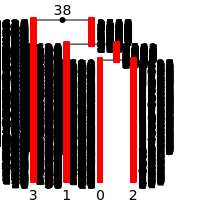

In [195]:
IPython.display.SVG(currtree.trees().next().draw())